<a href="https://colab.research.google.com/github/IliyaShestakov/OOAP/blob/main/PR_4_Var_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Шестаков Илья - по списку 18, всего вариантов - 15, соотвественно делаю 18 - 15 = 3 вариант

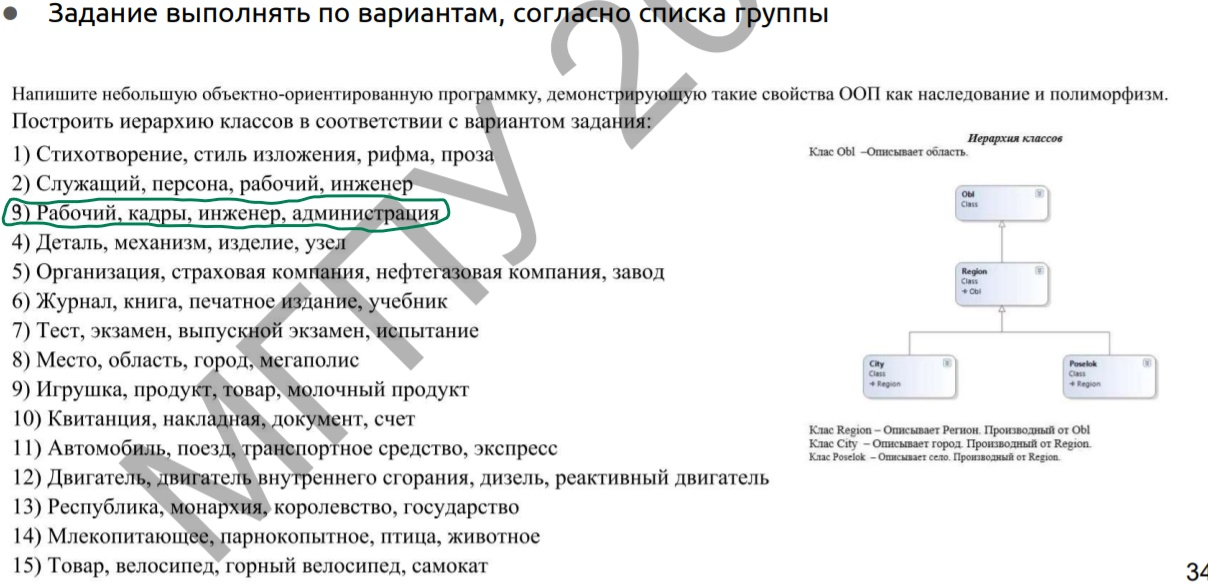

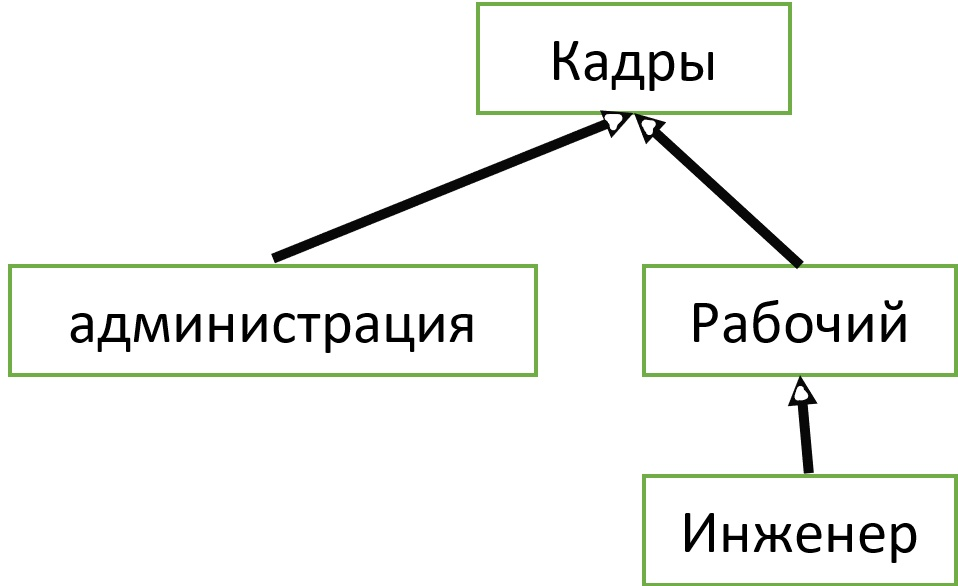

In [15]:
"""
Наследование в программе выражается через создание классов-наследников,
а полиморфизм - через подсчет заработной платы и определение того, выше она
прожиточного минимума или ниже (у разных классов-наследников ЗП считается
по-разному)
"""

class kadri: # класс "кадры" - родитель
# По умолчанию у какого-то кадра 0 по параметрам зарплаты, премий и прибавки, 
# они меняются в зависимости от факторов места работы, стажа и т.д.
    def __init__(self, FIO, chasivmes, staj, mesto, pol, zp = 0, premiya = 0, pribavka = 0): # конструктор класса кадры
        self.name = FIO
        self.ch = chasivmes
        self.st = staj
        self.me = mesto
        self.p = pol
        self.zp = zp
        self.prem = premiya
        self.prib = pribavka

    def Rad_plus(self): #1 прибавка к зп сотрудникам на радиоактивных предприятиях на 10к
        if self.me == "Радиоактивное предприятие":
            self.prib += 10000
            return self.prib
        else:
            return self.prib

    def Staj_plus(self): #2 премия сотруднику за выслугу лет
        self.prem = self.st * 1000
        return self.prem

    def itogo_deneg(self): #3 все деньги складывает
        return (self.zp + self.prem + self.prib)

    def deneg_v_chas(self): #4 считает сколько сотрудник получает за час без учета прибавок и премий 
        return (self.zp / self.ch)

class admistraciya(kadri): # класс "администрация" - наследник класса "кадры"
# конструктор класса администрация
# добавил новое свойство относительно кадров - кол-во отправ отчетов
    def __init__(self, FIO, chasivmes, staj, mesto, pol, otcheti, zp = 0, premiya = 0, pribavka = 0): 
        kadri.__init__(self, FIO, chasivmes, staj, mesto, pol, zp = 0, premiya = 0, pribavka = 0)
        self.ot = otcheti

    def Wo(self): #1 Превращает всех работников администрации в женщин
        self.p = "Ж"
        return self.p

    def ZP(self): #2 По особенному считает ЗП для администрации
        self.zp = self.ch * 500
        return self.zp

    def Opred(self): #3 Определяет уровень ЗП относительно ПМ
        if self.ch * 500 < 13000:
            return ("ЗП ниже прожиточного минимума")
        else:
            return ("ЗП выше прожиточного минимума")
    
    def OTCH(self): #4 определяет сколько отчетов отправлено
        if self.ot > 100:
            return ("столько, сколько надо")
        else:
            return ("мало")

    def __str__(self): # выводит информацию о работнике
        return ("ФИО работника: {}, пол работника {}, работает {} часов в месяц, стаж работы: {}, место работы: {}, отправлено отчетов: {}\nЗарплата сотрудника: {}, размер премии: {},\nИтого денег получит: {}, получает денег за час: {:.0f}, {}.".format(self.name, self.Wo(), self.ch, self.st, self.me, self.OTCH(), self.ZP(), self.Staj_plus(), self.itogo_deneg(), self.deneg_v_chas(), self.Opred()))

class rabochie(kadri): # класс "рабочий" - наследник класса "кадры"
# конструктор класса рабочий
# добавил новое свойство относительно кадров - квалификацию сотрудника
    def __init__(self, FIO, chasivmes, staj, mesto, pol, kval = 0, zp = 0, premiya = 0, pribavka = 0):
        kadri.__init__(self, FIO, chasivmes, staj, mesto, pol, zp = 0, premiya = 0, pribavka = 0)
        self.k = kval

    def ZP(self): #1
        self.zp = self.ch * 300 + 1000 * self.k
        return self.zp

    def Opred(self): #2
        if self.ch * 300 + 1000 * self.k < 13000:
            return ("ЗП ниже прожиточного минимума")
        else:
            return ("ЗП выше прожиточного минимума")

    def __str__(self): # выводит информацию о работнике
        return ("ФИО работника: {}, пол работника {}, работает {} часов в месяц, стаж работы: {}, место работы: {}, уровень квалификации: {},\nЗарплата сотрудника: {}, размер премии: {}, размер прибавки за место работы: {},\nИтого денег получит: {}, получает денег за час: {:.0f}, {}.".format(self.name, self.p, self.ch, self.st, self.me, self.k, self.ZP(), self.Staj_plus(), self.Rad_plus(), self.itogo_deneg(), self.deneg_v_chas(), self.Opred()))

class ingeneri(rabochie): # класс "инженер" - наследник класса "рабочий"
# конструктор класса инженер
# добавил новое свойство относительно рабочих - уровень образования
    def __init__(self, FIO, chasivmes, staj, mesto, pol, obr, kval = 0, zp = 0, premiya = 0, pribavka = 0):
        rabochie.__init__(self, FIO, chasivmes, staj, mesto, pol, kval = 0, zp = 0, premiya = 0, pribavka = 0)
        self.obr = obr

    def ZP(self): #1
        self.zp = self.ch * 700 + 1000 * self.k
        return self.zp

    def Proekt(self): #2 дает сложный или легкий проект в зависимости от образования
        if self.obr == "высшее":
            return ("сложный")
        if self.obr == "среднее":
            return ("легкий")

    def Opred(self): #3
        if self.ch * 700 + 3000 * self.k < 13000:
            return ("ЗП ниже прожиточного минимума")
        else:
            return ("ЗП выше прожиточного минимума")

    def __str__(self): # выводит информацию о работнике
        return ("ФИО работника: {}, пол работника {}, работает {} часов в месяц, стаж работы: {}, место работы: {}, уровень квалификации: {},\nУровень образования: {}, Уровень сложности проекта: {}\nЗарплата сотрудника: {}, размер премии: {}, размер прибавки за место работы: {},\nИтого денег получит: {}, получает денег за час: {:.0f}, {}.".format(self.name, self.p, self.ch, self.st, self.me, self.k, self.obr, self.Proekt(), self.ZP(), self.Staj_plus(), self.Rad_plus(), self.itogo_deneg(), self.deneg_v_chas(), self.Opred()))

K_1 = admistraciya("Гена", 40, 10, "место", "Мужчина", 101)
print("Работник 1, администрация:", K_1)

K_2 = rabochie("Васян", 90, 5, "Радиоактивное предприятие", "М", 10)
print("Работник 2, рабочий:", K_2)

K_3 = ingeneri('Алена', 100, 0, 'место 2', 'Ж', "высшее", 0)
print("Работник 3, инженер:", K_3)

Работник 1, администрация: ФИО работника: Гена, пол работника Ж, работает 40 часов в месяц, стаж работы: 10, место работы: место, отправлено отчетов: столько, сколько надо
Зарплата сотрудника: 20000, размер премии: 10000,
Итого денег получит: 30000, получает денег за час: 500, ЗП выше прожиточного минимума.
Работник 2, рабочий: ФИО работника: Васян, пол работника М, работает 90 часов в месяц, стаж работы: 5, место работы: Радиоактивное предприятие, уровень квалификации: 10,
Зарплата сотрудника: 37000, размер премии: 5000, размер прибавки за место работы: 10000,
Итого денег получит: 52000, получает денег за час: 411, ЗП выше прожиточного минимума.
Работник 3, инженер: ФИО работника: Алена, пол работника Ж, работает 100 часов в месяц, стаж работы: 0, место работы: место 2, уровень квалификации: 0,
Уровень образования: высшее, Уровень сложности проекта: сложный
Зарплата сотрудника: 70000, размер премии: 0, размер прибавки за место работы: 0,
Итого денег получит: 70000, получает денег за ч